In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/admin/OneDrive/Desktop/spam.csv",sep=',',encoding='ISO-8859-1')
df=pd.DataFrame(df)
list(df.columns)
df.rename(columns = {'v1':'label','v2':'Message'}, inplace = True)
df

,label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.describe()

,label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df['labels']=df['label'].map({'ham':0,'spam':1})

In [6]:
df

,label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,labels
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

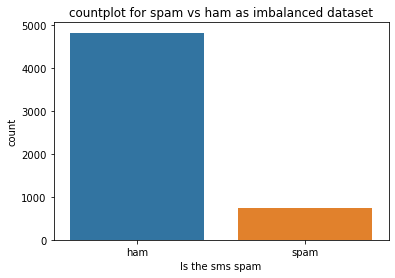

In [8]:
#countplot for spam vs ham as imbalanced dataset
#plt.figure(figsize=(8,8))
g=sns.countplot(x="label",data=df)
p=plt.title("countplot for spam vs ham as imbalanced dataset")
p=plt.xlabel("Is the sms spam")
p=plt.ylabel("count")

In [9]:
#handling imbalanced dataset using oversampling 
only_spam=df[df["labels"]==1]
only_spam

,label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,labels
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,1
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,1
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN,1
...,...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,1


In [10]:
print("No. of Spam SMS :",len(only_spam))
print("No. of Ham SMS :",len(df)-len(only_spam))

No. of Spam SMS : 747
No. of Ham SMS : 4825


In [11]:
count=int((df.shape[0]-only_spam.shape[0]) / only_spam.shape[0])
count

6

In [12]:
for i in range(0,count-1):
    df=pd.concat([df,only_spam])
df.shape

(9307, 6)

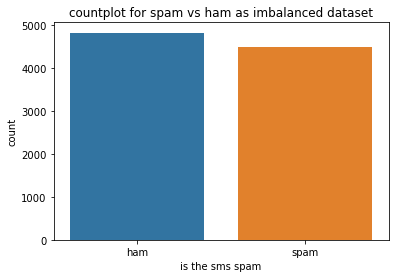

In [13]:
#countplot for spam vs ham as imbalanced dataset
#plt.figure(figsize=(8,8))
g=sns.countplot(x="label",data=df)
p=plt.title("countplot for spam vs ham as imbalanced dataset")
p=plt.xlabel("is the sms spam")
p=plt.ylabel("count")


In [14]:
#creating new feature word_count
df['word_count']=df['Message'].apply(lambda x:len(x.split()))

In [15]:
df

,label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,labels,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,20
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,28
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,13
...,...,...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,1,16
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,1,33
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,1,28
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,1,28


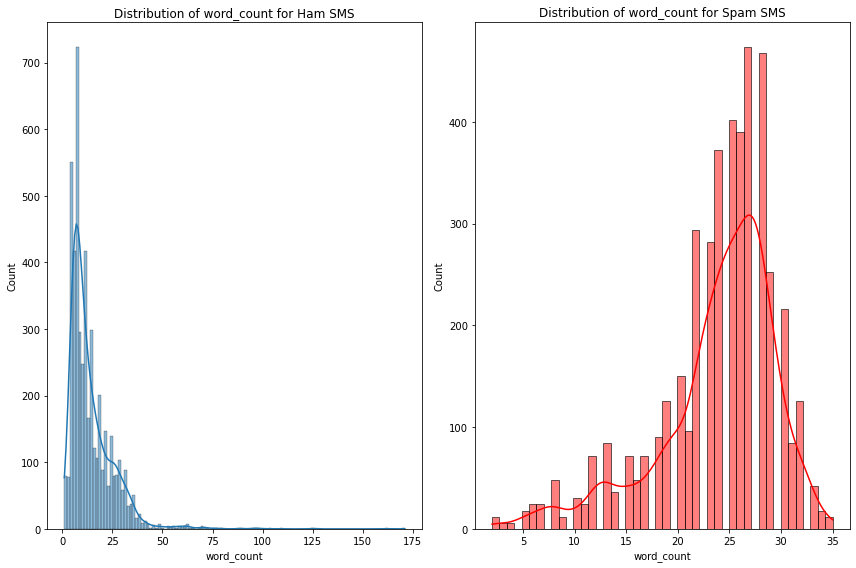

In [49]:
plt.figure(figsize=(12,8))
#[1,1]
plt.subplot(1,2,1)
g=sns.histplot(df[df['labels']==0].word_count,kde=True)
p=plt.title('Distribution of word_count for Ham SMS')
#[1,2]
plt.subplot(1,2,2)
g=sns.histplot(df[df['labels']==1].word_count,color="red",kde=True)
p=plt.title('Distribution of word_count for Spam SMS')
plt.tight_layout()
plt.show()

In [16]:
#creating new features of containing symbols
def currency_peresent(data):
    currency_symbols=['$',' € ','£', '¥','₣']
    for i in currency_symbols:
        if i in df:
             return 1
        return 0

In [17]:
df["contains_currency_symbols"]=df["Message"].apply(currency_peresent)

In [18]:
df

,label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,labels,word_count,contains_currency_symbols
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,20,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,28,0
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,11,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,13,0
...,...,...,...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,1,16,0
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,1,33,0
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,1,28,0
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,1,28,0


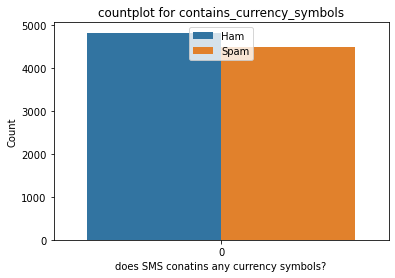

In [54]:
# countplot for contains_currency_symbols
#plt.figure(figsize=(8,8)
g=sns.countplot(x='contains_currency_symbols',data=df,hue='label')
p=plt.title("countplot for contains_currency_symbols")
p=plt.xlabel("does SMS conatins any currency symbols?")
p=plt.ylabel("Count")
p=plt.legend(labels=["Ham","Spam"],loc=9)
           

In [34]:
# creating new features of containing numbers
def numbers(data):
    for n in data:
        if ord(n) >=48 and ord(n)<=57:
            return 1
    return 0

In [35]:
df["contains_numbers"]=df["Message"].apply(numbers)

In [36]:
df

,label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,labels,word_count,contains_currency_symbols,contains_numbers
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,20,0,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,6,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,28,0,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,11,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,13,0,0
...,...,...,...,...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,1,16,0,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,1,33,0,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,1,28,0,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,1,28,0,1


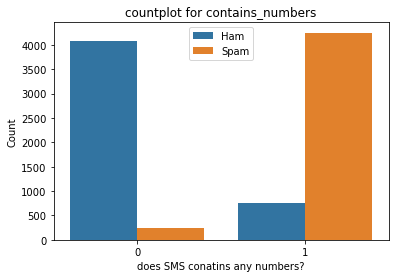

In [52]:
# countplot for contains_currency_symbols
#plt.figure(figsize=(8,8)
g=sns.countplot(x='contains_numbers',data=df,hue='label')
p=plt.title("countplot for contains_numbers")
p=plt.xlabel("does SMS conatins any numbers?")
p=plt.ylabel("Count")
p=plt.legend(labels=["Ham","Spam"],loc=9)
           

In [76]:
#data cleaning 
import nltk
import re
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


True

In [81]:
corpus=[]
wnl=WordNetLemmatizer()
for sms in list(df.Message):
    message=re.sub(pattern='["a-zA-Z]',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=" ".join(lemm_words)
    corpus.append(message)
    

In [82]:
corpus

[', .. ... ...',
 '... ...',
 "2 21 2005. 87121 ( ) & ' 08452810075 18'",
 '... ...',
 "' ,",
 "' 3 ' ! ' ? ! , å£1.50",
 '. .',
 "' ( )' . *9",
 '!! å£900 ! 09061701461. 341. 12 .',
 '11 ? ! 08002986030',
 "' ' , ? ' .",
 '! 100 20,000 > 11 87575. 150 / , 6 , 16+ 4',
 '! 1 å£100,000 ! : : 81010 & . . 4403 1 7 18',
 "' . . .",
 '!!',
 ': , >> :// . . ? =',
 "... ' :)",
 '2 ... . .',
 'åõ . åõ',
 '- / . 87077 87077 : , 4 /ì¼1.20 36504 45 16+',
 '?',
 '\x89û÷ 2',
 'ì_ ... ...',
 '. 3 . ?',
 '. ?',
 ". ' . . . ' .",
 '.',
 "? ? ? ' ? ?",
 "' & ; ' , ' '",
 '. . ! ?',
 "' , ' '",
 "2 . . 2! ' ! . ?",
 '.',
 '?',
 'å£5/ .',
 '... ì_ ... 2 8',
 ", ' '",
 '',
 '... ...',
 "! ' ? ' . ' !",
 '. . .',
 '? , , ... ... ... ...',
 '07732584351 - - = + . 08000930705',
 '?',
 '! . & ;#& ; ...',
 '.. ..',
 "' .",
 ', ?',
 ", '",
 "' . ' . ' . .",
 '. .',
 '& ;#& ; , & ;#& ;',
 "'",
 ". . , \\ \\ . ' ' ' . ' . ' .",
 '. : . ? ?',
 '? @ & ; & ;',
 '! 1 2 . 09061209465 ! , 3, 3, 4 ! 420- 4-5 . 150 . !',


In [93]:
#creating the beg of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
features_names=tfidf.get_feature_names_out()

In [106]:
X=pd.DataFrame(vectors,columns=features_names)
y=df['labels']

In [99]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
X_train

,00,000,008704050406,0089,0121,01223585236,01223585334,01327,02,0207,...,åá,åò,åõ,ì_,ì¼1,ìï,û_,ûª,ûï,ûò
3533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
# Naive bayes model
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv=cross_val_score(mnb,X,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.852
0.01


In [112]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       958
           1       0.99      0.69      0.81       904

    accuracy                           0.84      1862
   macro avg       0.88      0.84      0.84      1862
weighted avg       0.88      0.84      0.84      1862



In [116]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[952,   6],
       [283, 621]], dtype=int64)

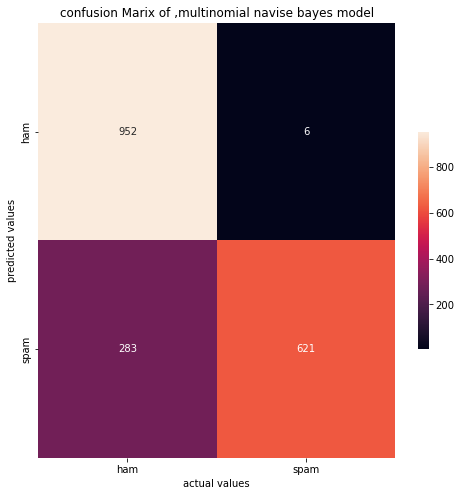

In [128]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={"shrink":0.5})
p=plt.title("confusion Marix of ,multinomial navise bayes model")
p=plt.xlabel("actual values")
p=plt.ylabel("predicted values")

In [130]:
def predict_spam(sms):
    message=re.sub(pattern='["a-zA-Z]',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=" ".join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return mnb.predict(temp)
    

In [137]:
sample_message='"Hurry – your IRS tax refund is ready to be accepted! You only have 24 hours, so click below: [link]. Take advantage of this fantastic opportunity for extra cash – act now and  IRS tax  today!"'
if predict_spam(sample_message):
    print("Yes this is a spam message")
else:
    print("no this is not a spam message")

Yes this is a spam message


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
